In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("train.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618


        x
0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
..    ...
695  58.0
696  93.0
697  82.0
698  66.0
699  97.0

[699 rows x 1 columns]              y
0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
..         ...
695  58.595006
696  94.625094
697  88.603770
698  63.648685
699  94.975266

[699 rows x 1 columns]
X Train :  489
Y Train :  489
X Test :  210
Y Test :  210


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


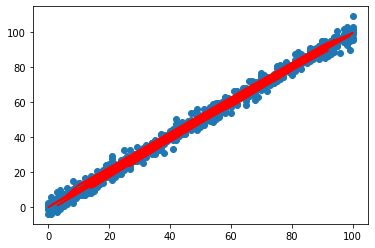

Mean Squared Error  9.822490759363768
Mean Absolute Error  2.4674581078009896
R2 Score  0.9880359196504968


In [6]:
df.dropna(inplace=True)
x = pd.DataFrame(df.iloc[:,0])
y = pd.DataFrame(df.iloc[:,1])
print(x,y)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
reg = RandomForestRegressor(n_estimators=10,random_state=0)
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3)
print("X Train : ",len(xtr))
print("Y Train : ",len(ytr))
print("X Test : ",len(xte))
print("Y Test : ",len(yte))
reg.fit(xtr,ytr)
y_pr=reg.predict(xte)
plt.scatter(x,y)
plt.plot(xte,y_pr,color="r")
plt.show()
print("Mean Squared Error ",mean_squared_error(yte,y_pr))
print("Mean Absolute Error ",mean_absolute_error(yte,y_pr))
print("R2 Score ",r2_score(yte,y_pr))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


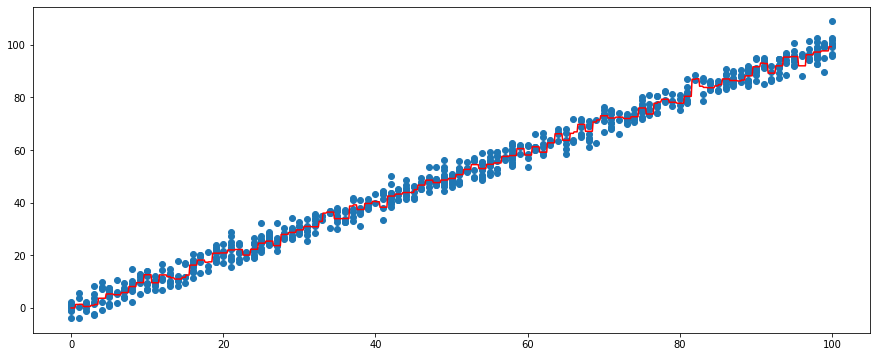

In [7]:
x_grid = np.arange(min(x.values),max(x.values),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.figure(figsize=(15,6))
plt.scatter(x,y)
plt.plot(x_grid,reg.predict(x_grid),color="r")
plt.show()